In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn import metrics 


In [7]:
data = '/content/drive/MyDrive/HR_Attrition.csv'
df = pd.read_csv(data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [8]:
df_num = df[['Age','DailyRate','DistanceFromHome','EmployeeNumber','HourlyRate','JobInvolvement','MonthlyIncome',
             'MonthlyRate','NumCompaniesWorked','PercentSalaryHike','StandardHours','TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]
df_cat = df[['Attrition','BusinessTravel','Department','Education','EducationField','EnvironmentSatisfaction','Gender','JobLevel',
             'JobRole','JobSatisfaction','MaritalStatus','Over18','OverTime','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance','EmployeeCount']]


Chú thích cho các attributes của dataset

Age: Tuổi

Attrition : nghỉ việc(yes/no)

BusinessTravel: Tình trạng du lịch

DailyRate: Tỉ lệ chấm công

Department: Phòng ban
DistanceFromHome: Khoảng cách từ nhà đến công ty

Education: Bằng cấp

EducationField: Ngành học

EmployeeCount: Nhân viên này có đang làm việc hay không

EmployeeNumber: Định danh của nhân viên

EnvironmentSatisfaction: Mức dộ thỏa mãn môi trường làm việc
Gender: Giới tính

HourlyRate: Tỉ lệ giờ

JobInvolvement: Sô công việc đang làm

Joblevel: Cấp độ công việc

JobSatisfaction: Mức độ hài lòng công việc

MarialStatus: Tình trạng hôn nhân

MonthlyIncome: Thu nhập hàng tháng

MonthlyRate: Tỉ lệ thu nhập hàng tháng

NumCompaniesWorked: Số công ty đã từng làm

Over18: Lớn hơn 18 tuổi

Overtime: làm ngoài giờ

PercentSalaryHike: Phần trăm tăng lương

PerformanceRating: tỉ lệ đánh giá công việc

RelationshipSatisfaction: Mức độ hài lòng các mqh

StandardHours: Giờ làm tiêu chuẩn

StockOptionLevel: Mức độ chọn chứng khoán 

TotalWorkingyears: Tổng số năm làm việc

TrainingTimeLastyear: Số lần tham gia training năm ngoái 

WorkLifeBalance: Cân bằng trong công việc

YearsAtCompany: Số năm làm việc tại công ty

YeasInCurrentRole: Số năm làm vị trí hiện tại

YearsSinceLastPromotion: Số năm từ lần cuối thăng chức

YearsWithCurrentManager : Số năm làm việc với quản lí hiện tại.






In [9]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
df.drop(['StandardHours'], axis=1, inplace=True)
df.drop(['EmployeeCount'], axis=1, inplace=True)
df.drop(['Over18'], axis=1, inplace=True)

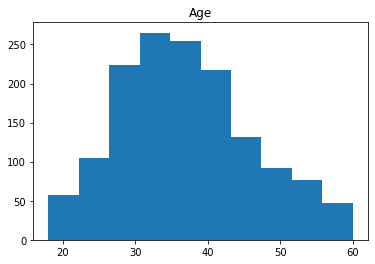

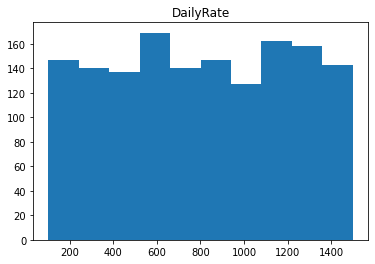

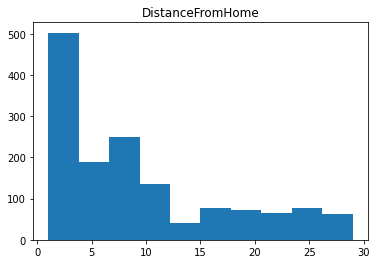

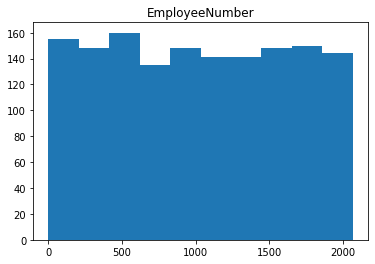

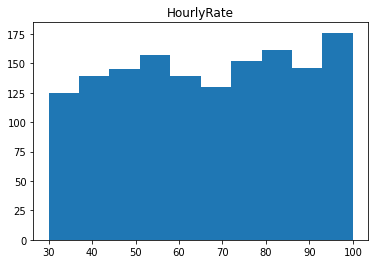

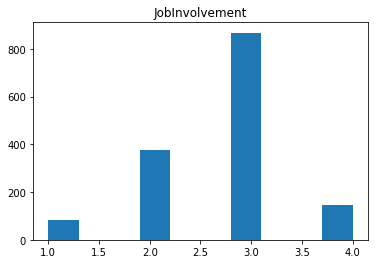

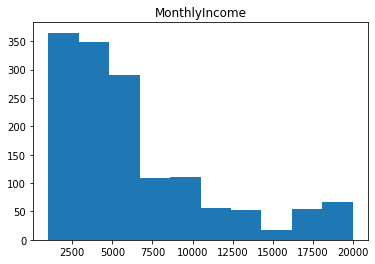

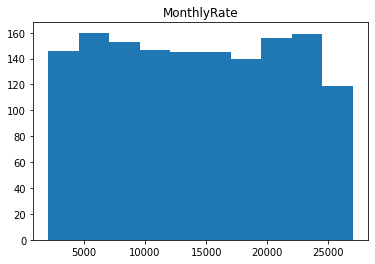

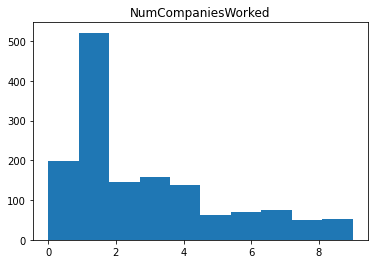

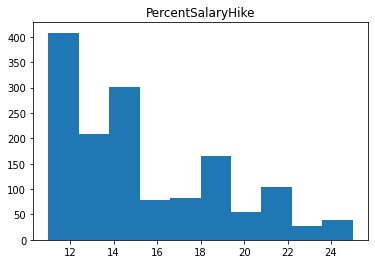

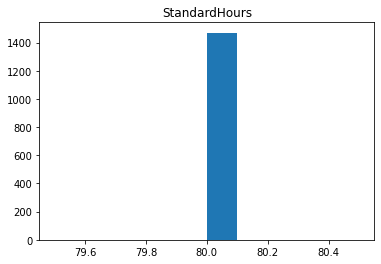

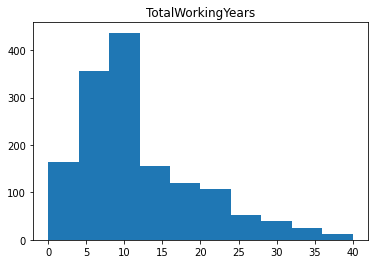

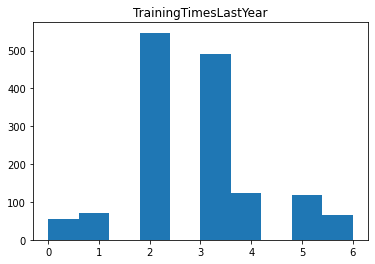

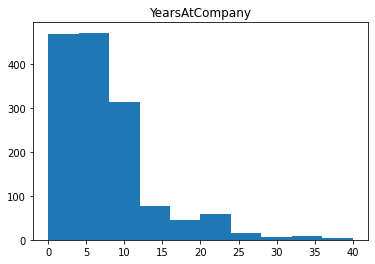

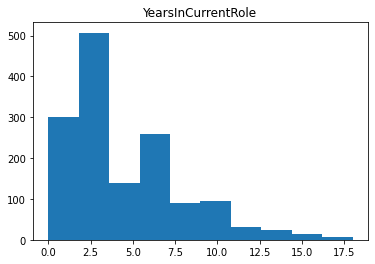

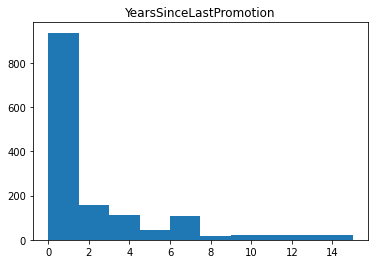

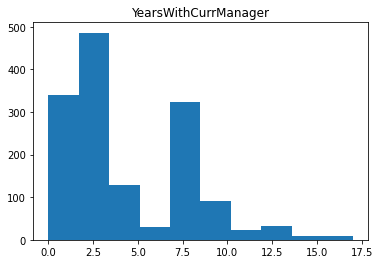

In [11]:
# Showw histogram of categorical variables
for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

In [12]:
corrmat = df.corr()
corrmat


,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


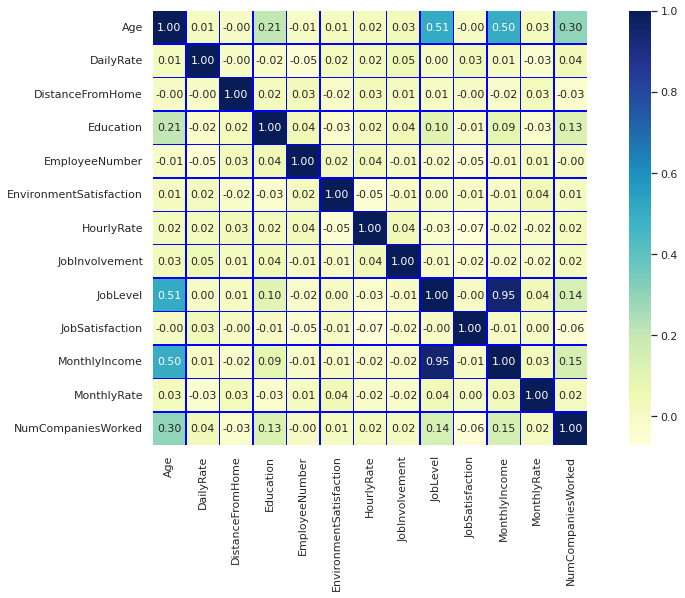

In [13]:
h1 = corrmat.loc['Age':'NumCompaniesWorked', 'Age':'NumCompaniesWorked']
h2 = corrmat.loc['PercentSalaryHike':, 'Age':'NumCompaniesWorked']
h3 = corrmat.loc['PercentSalaryHike':, 'PercentSalaryHike':]

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(h1, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, cmap="YlGnBu", 
            linewidths=0.5, linecolor='blue')
 # Insight - MonthlyIncome và JobLevel liên quan tương quan khá lớn với nhau


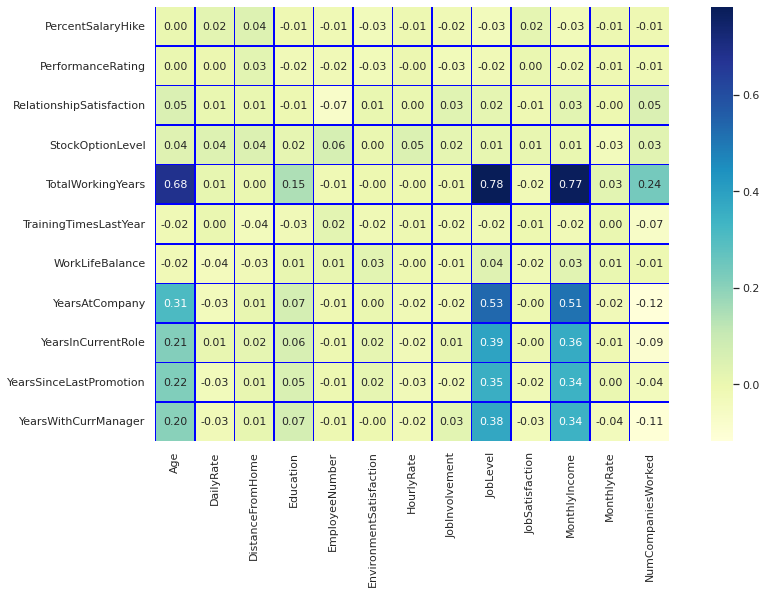

In [14]:
sns.heatmap(h2, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, cmap="YlGnBu", 
            linewidths=0.5, linecolor='blue')

# Insights:
# TotalWorkingYears và JobLevel tương quan khá lớn
# TotalWorkingYears và MonthlyIncome tương quan khá lớn

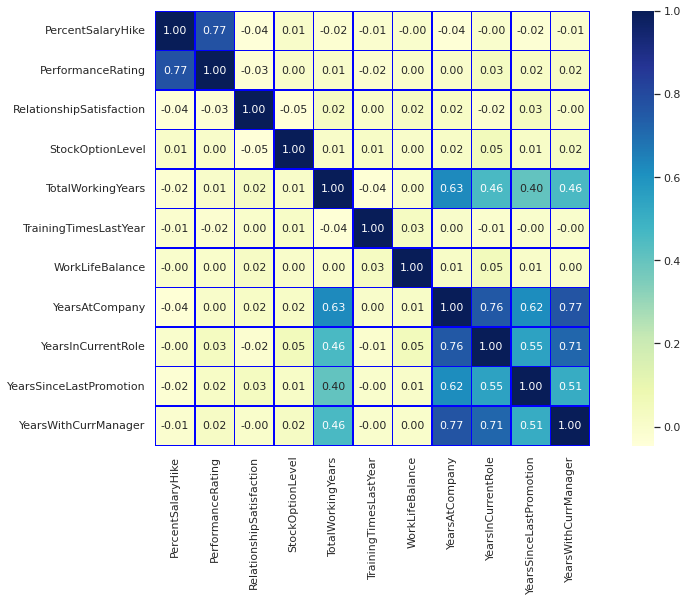

In [15]:
sns.heatmap(h3, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, cmap="YlGnBu", 
            linewidths=0.5, linecolor='blue')

# Insights:
# PercentSalaryHike và PerformanceRating tương quan khá lớn
# YearsInCurrentRole và YearsAtCompany tương quan khá lớn
# YearsWithCurrManager và YearsAtCompany tương quan khá lớn

In [16]:
# Drop các biến có tương quan lớn trong dataset
df_final = df.drop(['JobLevel','TotalWorkingYears','YearsInCurrentRole', 'YearsWithCurrManager' , 'PercentSalaryHike'], axis=1)
df_final

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,19479,8,Yes,3,1,0,0,1,6,0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,24907,1,No,4,4,1,3,3,10,1
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2396,6,Yes,3,2,0,3,3,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,23159,1,Yes,3,3,0,3,3,8,3
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,16632,9,No,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,12290,4,No,3,3,1,3,3,5,0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,21457,4,No,3,1,1,5,3,7,1
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,5174,1,Yes,4,2,1,0,3,6,0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,13243,2,No,3,4,0,3,2,9,0


In [17]:
# Encode các biến định tính
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    return res_df

In [18]:
encoded_df = preprocessor(df_final)
encoded_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,MonthlyRate,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,2,1102,2,1,1,1,1,2,...,19479,8,1,3,1,0,0,1,6,0
1,49,0,1,279,1,8,0,1,2,3,...,24907,1,0,4,4,1,3,3,10,1
2,37,1,2,1373,1,2,1,4,4,4,...,2396,6,1,3,2,0,3,3,0,0
3,33,0,1,1392,1,3,3,1,5,4,...,23159,1,1,3,3,0,3,3,8,3
4,27,0,2,591,1,2,0,3,7,1,...,16632,9,0,3,4,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,1,3,2061,3,...,12290,4,0,3,3,1,3,3,5,0
1466,39,0,2,613,1,6,0,3,2062,4,...,21457,4,0,3,1,1,5,3,7,1
1467,27,0,2,155,1,4,2,1,2064,2,...,5174,1,1,4,2,1,0,3,6,0
1468,49,0,1,1023,2,2,2,3,2065,4,...,13243,2,0,3,4,0,3,2,9,0


In [19]:
X = encoded_df.drop(['Attrition'],axis =1)
y = encoded_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [20]:
#Standard Scale
sc = StandardScaler()
X = sc.fit_transform(X)

In [21]:
# split train test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state= 0)


In [22]:
# implement model
logistic = LogisticRegression()
logistic.fit(X_train,y_train)


LogisticRegression()

[[239   6]
 [ 32  17]]


Text(0.5, 510.88, 'Predicted label')

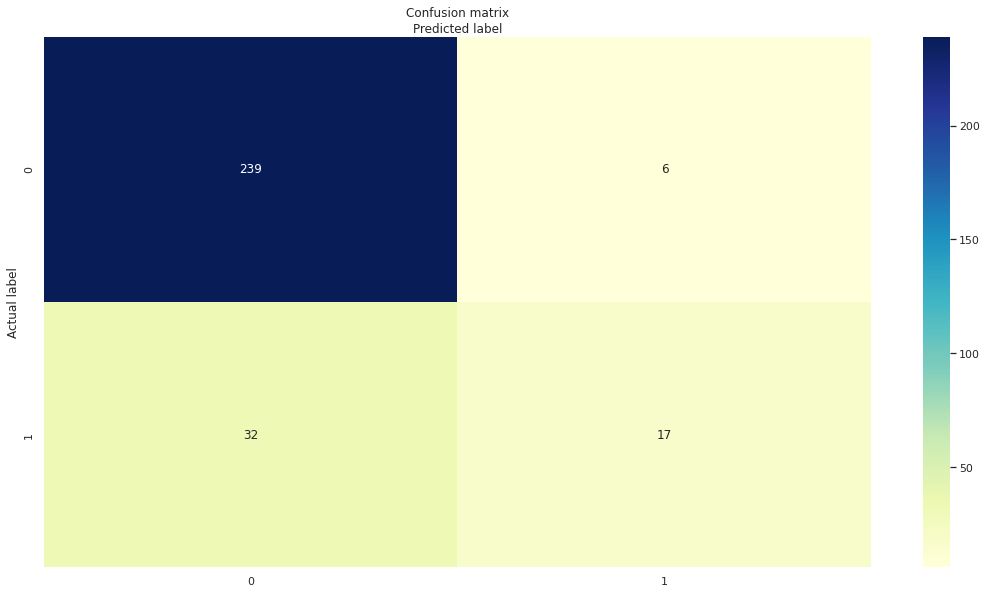

In [26]:
y_pred=logistic.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8707482993197279
Precision: 0.7391304347826086
Recall: 0.3469387755102041


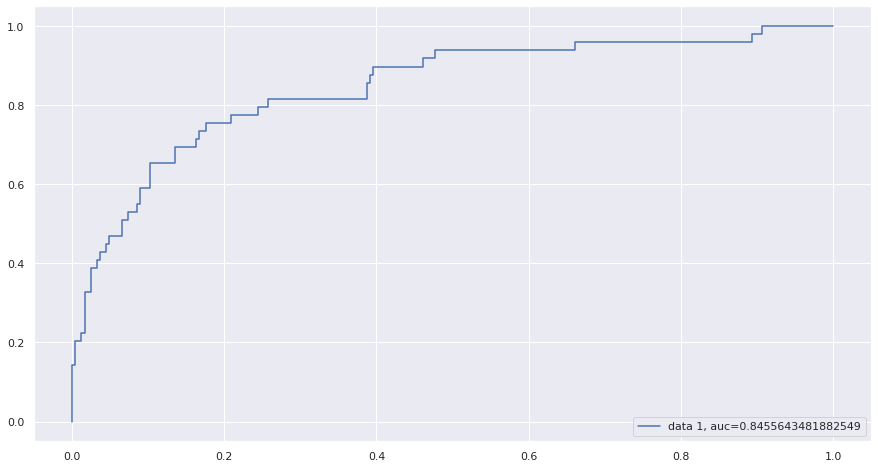

In [25]:
y_pred_proba = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()